<a href="https://colab.research.google.com/github/Faysal3010/Deep-Learning-/blob/main/Feedforward_nn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from imblearn.over_sampling import RandomOverSampler

In [3]:
df=pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.columns


Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

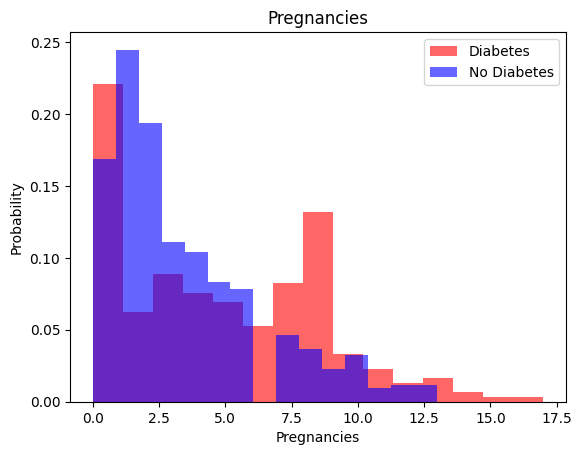

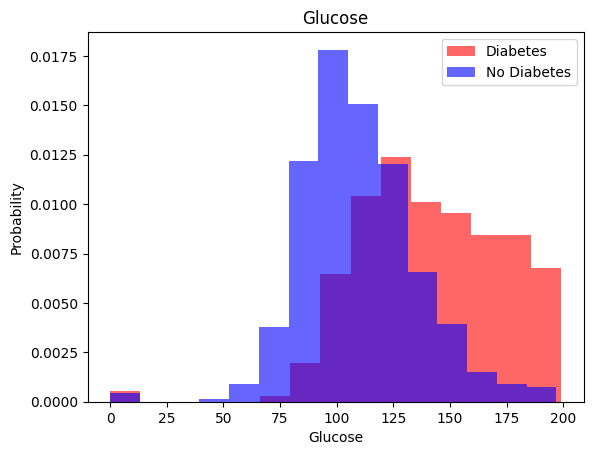

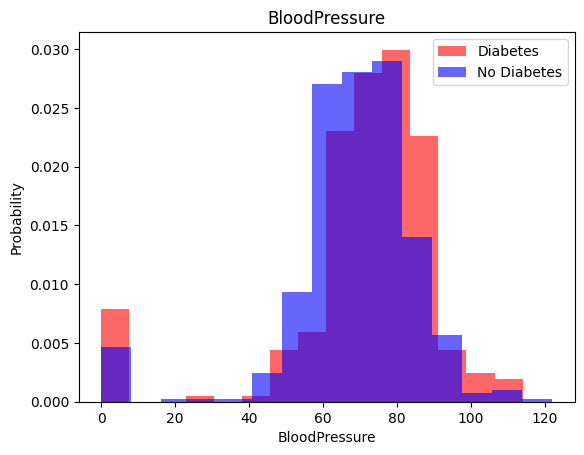

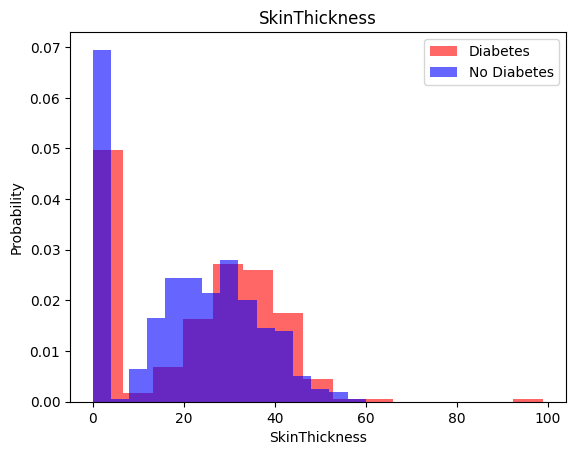

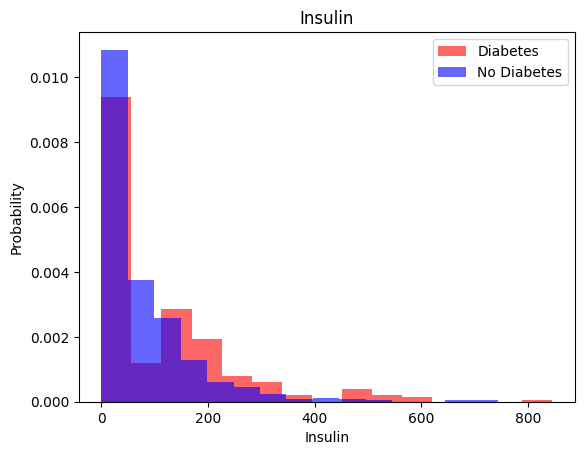

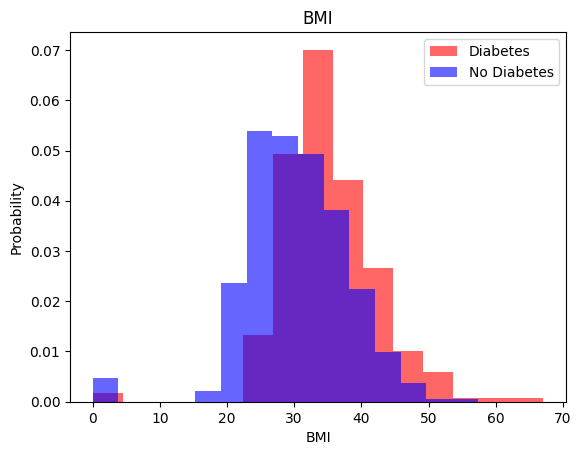

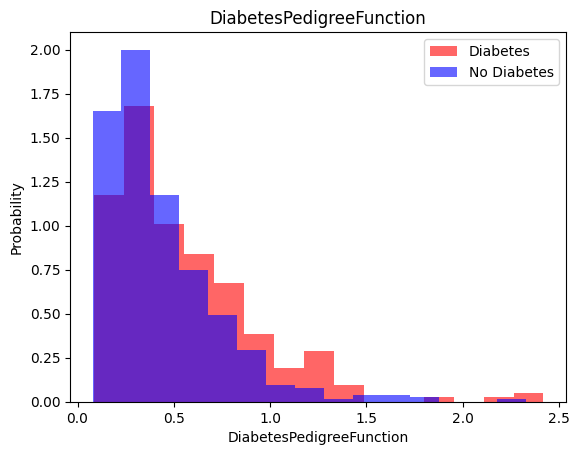

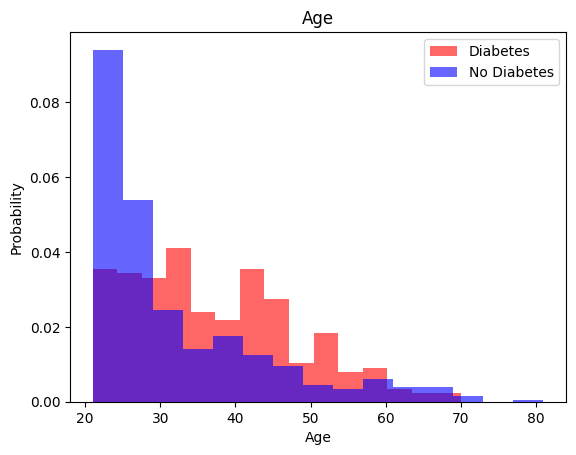

In [16]:
size=len(df.columns[:-1])
for i in range(size):
  label=df.columns[i]
  plt.hist(df[df['Outcome']==1][label],color='red',label="Diabetes", alpha=0.6,density=True,bins=15)
  plt.hist(df[df['Outcome']==0][label],color='blue',label="No Diabetes",alpha=0.6,density=True,bins=15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [17]:
X= df[df.columns[:-1]].values
Y= df[df.columns[-1]].values

In [19]:
X.shape,Y.shape

((768, 8), (768,))

In [20]:
scaler=StandardScaler()
X = scaler.fit_transform(X)
data = np.hstack((X,np.reshape(Y,(-1,1))))
transformed_df=pd.DataFrame(data,columns=df.columns)

In [22]:
transformed_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1.0
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0.0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1.0
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0.0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1.0


In [27]:
over = RandomOverSampler()
X, Y = over.fit_resample(X, Y)
data = np.hstack((X, np.reshape(Y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [36]:
len(transformed_df[transformed_df["Outcome"]==1]),len(transformed_df[transformed_df['Outcome']==0])

(500, 500)

In [106]:
# X= transformed_df[transformed_df.columns[:-1]].values
# Y= transformed_df[transformed_df.columns[-1]].values

In [120]:
x_train,x_temp,y_train,y_temp=train_test_split(X,Y,test_size=.4,random_state=0)
x_valid,x_test,y_valid,y_test=train_test_split(x_temp,y_temp,test_size=.5,random_state=0)

In [121]:
len(y_train),len(y_temp),len(y_test),len(y_valid)

(600, 400, 200, 200)

In [123]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(16,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid'),
])

In [124]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss = tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy']
              )

In [125]:
#model.evaluate(x_train,y_train)
loss,accuracy = model.evaluate(x_train,y_train)
print(f"loss:{loss}   ;    accuracy: {accuracy}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5240 - loss: 0.7138  
loss:0.7256474494934082   ;    accuracy: 0.5066666603088379


In [126]:
loss,accuracy = model.evaluate(x_valid,y_valid)
print(f"loss:{loss}   ;    accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4534 - loss: 0.7589 
loss:0.7516478896141052   ;    accuracy: 0.4699999988079071


In [130]:
model.fit(x_train,y_train,batch_size=16,epochs=25,validation_data=(x_valid,y_valid))

Epoch 1/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7881 - loss: 0.4334 - val_accuracy: 0.8000 - val_loss: 0.4468
Epoch 2/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8285 - loss: 0.3845 - val_accuracy: 0.7850 - val_loss: 0.4467
Epoch 3/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8050 - loss: 0.4041 - val_accuracy: 0.8050 - val_loss: 0.4451
Epoch 4/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8026 - loss: 0.4214 - val_accuracy: 0.8000 - val_loss: 0.4446
Epoch 5/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7928 - loss: 0.4210 - val_accuracy: 0.8000 - val_loss: 0.4463
Epoch 6/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8137 - loss: 0.4003 - val_accuracy: 0.8150 - val_loss: 0.4453
Epoch 7/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7621 - loss: 0.4641 - val_accuracy: 0.8100 - val_loss: 0.4479
Epoch 8/25
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8224 - loss: 0.3961 - val_accuracy: 0.8050 - val_loss:

In [134]:
loss,accuracy =model.evaluate(x_test, y_test)
print(f"loss:{loss}   ;    accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7762 - loss: 0.4256
loss:0.44197916984558105   ;    accuracy: 0.7749999761581421
